In [2]:
from trebugger import TreBugger

In [3]:
from qiskit.circuit.random import random_circuit 
from qiskit.test.mock import FakeCasablanca 
from qiskit import transpile

In [4]:
rc = random_circuit(num_qubits = 5, depth = 10)
casb = FakeCasablanca()

In [17]:
trb = TreBugger()

In [19]:
trb.debug(rc,casb,1)

Accordion(children=(VBox(children=(HTML(value='<h1> TreBugger</h1> <hr>'), HBox(children=(Button(description='…

# Testing debugger 
- Using different number of qubits and depths to test the debugger

## 1. Depth test
- Qubits : 7
- Depth : variable
- Optimization level : 1


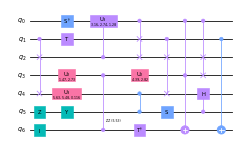

In [7]:
circs = []
for depth in range(5,40,5):
    circs.append(random_circuit(num_qubits = 7, depth = depth, seed = depth))
circs[0].draw('mpl',scale = 0.4)

- Debugging

In [9]:
import time 
trb = TreBugger()
depths = []
trb_times, transpile_times = [], []
for i in range(len(circs)):
    circuit = circs[i]
    t_times, tb_times = 0, 0
    
    # do 5 experiments
    for i in range(5):
        t1 = time.time()
        transpile(circuits = circuit, backend = casb, optimization_level = 1, seed_transpiler = 412)
        t2 = time.time()
        t_times+= round(t2-t1,3)

        t1 = time.time()
        trb.debug(circuit, casb, 1,seed = 412, disp = False)
        t2 = time.time()
        tb_times += round((t2-t1),3)
    
    transpile_times.append(round(t_times/5,4))
    trb_times.append(round(tb_times/5,4))
    depths.append(circuit.depth())
    

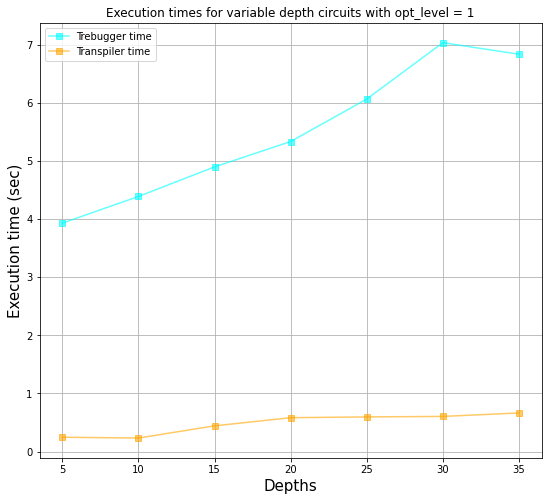

In [10]:
import matplotlib.pyplot as plt 
plt.figure(figsize = (9,8))
plt.title("Execution times for variable depth circuits with opt_level = 1")
plt.xlabel("Depths", fontsize = 15)
plt.ylabel("Execution time (sec)", fontsize = 15)
plt.plot(depths, trb_times, marker = 's', color = 'cyan', alpha = 0.6, label = 'Trebugger time')
plt.plot(depths, transpile_times, marker = 's', color = 'orange', alpha = 0.6, label = 'Transpiler time')
plt.legend()
plt.grid()
plt.savefig("Varied Depth opt-level1.png", dpi = 250)

## 2. Qubit Test
- Qubits : variable
- Depth : 30
- Optimization level : 1


In [13]:
from qiskit import Aer 
backend = Aer.get_backend('qasm_simulator')

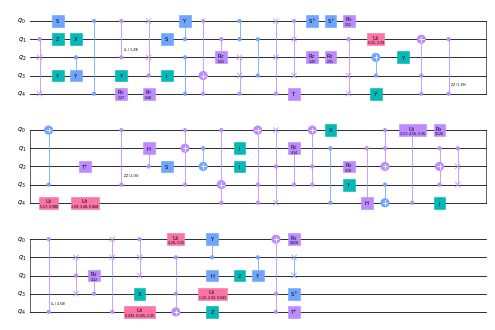

In [14]:
circs = []
for q in range(5,25,2):
    circs.append(random_circuit(num_qubits = q, depth = 30, seed = q))
circs[0].draw('mpl',scale = 0.4)

In [15]:
import time 
trb = TreBugger()
qubits = []
trb_times_q, transpile_times_q = [], []
for i in range(len(circs)):
    
    circuit = circs[i]
    q = len(circuit.qubits)
    
    t_times, tr_times = 0,0
    for i in range(5):
        # transpile
        t1 = time.time()
        transpile(circuits = circuit, backend = backend, optimization_level = 1, seed_transpiler = q)
        t2 = time.time()
        
        t_times += round(t2-t1,3)
        # debug
        t1 = time.time()
        trb.debug(circuit, backend, 1,seed = q, disp = False)
        t2 = time.time()
        
        tr_times += round(t2-t1,3)
    
    
    transpile_times_q.append(round(t_times/5,3))
    trb_times_q.append(round(tr_times/5,3))
    qubits.append(q)
    

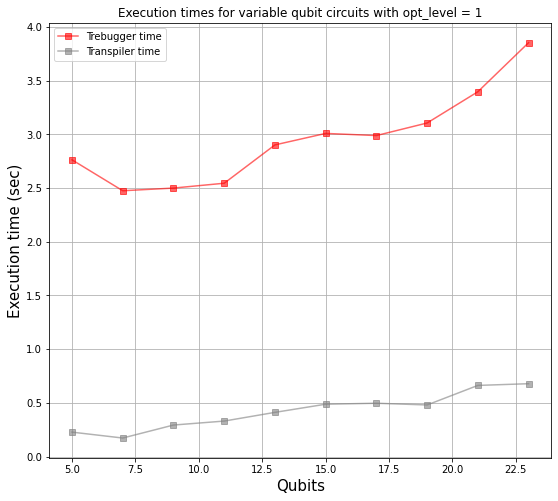

In [16]:
import matplotlib.pyplot as plt 
plt.figure(figsize = (9,8))
plt.title("Execution times for variable qubit circuits with opt_level = 1")
plt.xlabel("Qubits", fontsize = 15)
plt.ylabel("Execution time (sec)", fontsize = 15)
plt.plot(qubits, trb_times_q, marker = 's', color = 'red', alpha = 0.6, label = 'Trebugger time')
plt.plot(qubits, transpile_times_q, marker = 's', color = 'grey', alpha = 0.6, label = 'Transpiler time')
plt.legend()
plt.grid()
plt.savefig("Varied qubits depth 30.png", dpi = 200)